In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import nltk

In [2]:
df = pd.read_csv("train.csv.zip", compression="zip")

In [3]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [4]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [5]:
df.shape

(159571, 8)

In [6]:
# Percentage of toxic comments
df[df.toxic == 1].shape[0]/df.shape[0] * 100

9.584448302009765

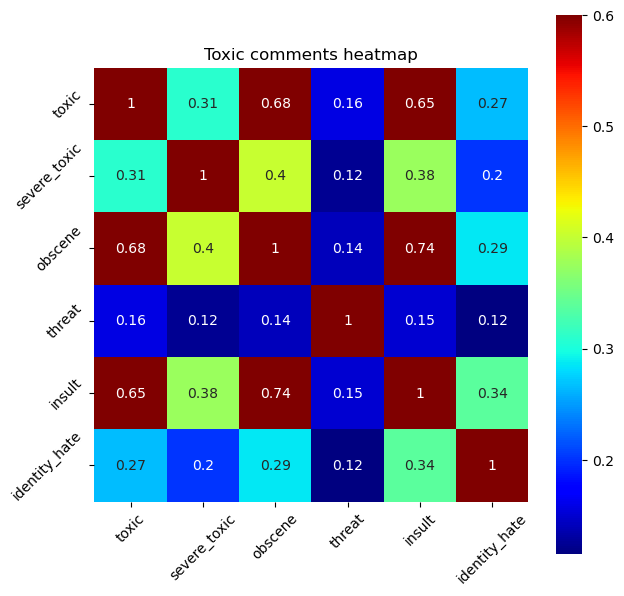

In [7]:
plt.figure('heatmap', figsize=[7,7])
plt.title("Toxic comments heatmap")
df_corr = df.select_dtypes(int).corr()
sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap="jet")
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.show()

In [8]:
for i in df[df.toxic == 1].comment_text[1:5]:
    print("Toxic comment: \n" + i)

Toxic comment: 
Hey... what is it..
@ | talk .
What is it... an exclusive group of some WP TALIBANS...who are good at destroying, self-appointed purist who GANG UP any one who asks them questions abt their ANTI-SOCIAL and DESTRUCTIVE (non)-contribution at WP?

Ask Sityush to clean up his behavior than issue me nonsensical warnings...
Toxic comment: 
Bye! 

Don't look, come or think of comming back! Tosser.
Toxic comment: 
You are gay or antisemmitian? 

Archangel WHite Tiger

Meow! Greetingshhh!

Uh, there are two ways, why you do erased my comment about WW2, that holocaust was brutally slaying of Jews and not gays/Gypsys/Slavs/anyone...

1 - If you are anti-semitian, than shave your head bald and go to the skinhead meetings!

2 - If you doubt words of the Bible, that homosexuality is a deadly sin, make a pentagram tatoo on your forehead go to the satanistic masses with your gay pals!

3 - First and last warning, you fucking gay - I won't appreciate if any more nazi shwain would write 

In [9]:
df[(df.identity_hate == 1) & (df.toxic == 0)]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
3620,09b51ed1ee5e29a1,"Mate, sound like you are jewish\n\nGayness is ...",0,0,0,0,0,1
4468,0be7965b23078261,"""Just face the truth: you can't escape it!==\n...",0,0,1,0,1,1
5839,0f9a7ba1acde6b6e,"it is obvius to, me, a black man, that orange ...",0,0,0,0,0,1
7036,12c82a67010c0fcf,"""\n\nAn illness has nothing to do with time/er...",0,0,0,0,1,1
8417,165fe8bb208c44d0,"Now.. For the picture page to remain, what do ...",0,0,0,0,1,1
...,...,...,...,...,...,...,...,...
149928,63c44599fce8f0c2,"Basically, homosexuality lowers productivity, ...",0,0,0,0,0,1
152432,8d5357b31c79fb9f,False information? How about you go get your f...,0,0,1,0,1,1
154391,ad4079b703b3d6a8,"""Behinderte Russen: Meaning """"Retarded Russian...",0,0,1,0,1,1
154533,af479dae8f48eb56,The Jews who keep trolling this article are me...,0,0,0,0,0,1


In [10]:
# We see that not all toxic comments are identity_hate = 1

In [11]:
for i in df[(df.identity_hate == 1) & (df.toxic == 0)].comment_text[2:3]:
    print(i)

it is obvius to, me, a black man, that orange is for da black Gs, blue is for mexicans and yellow is 4 whites. coz whites look like woman. and mexicans try to compete with da nigger Gs but we r too strong. but in realty the whites also lose to da black man coz we have foot longs124.176.226.45  

Orange-throated males are strongest and do not form strong pair bonds; instead, they fight blue-throated males for their females. Yellow-throated males, however, manage to snatch females away from them for mating.
Blue-throated males are middle-sized and form strong pair bonds. While they are outcompeted by orange-throated males, they can defend against yellow-throated ones.
Yellow-throated males are smallest, and their coloration mimics females. Under this disguise, they can approach orange-throated males (though not the stronger-bonding, blue-throated specimens) and mate while the orange-throats are engaged in fights.


In [12]:
df["length"] = df.comment_text.apply(lambda x: len(x))

In [13]:
df

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


In [14]:
print("Average length of toxic comments " + str(df[df.toxic == 1].length.mean()))

Average length of toxic comments 295.24604420034


In [15]:
print("Average length of clear comments " + str(df[df.toxic == 0].length.mean()))

Average length of clear comments 404.5493391185012


In [16]:
print("Median length of toxic comments " + str(df[df.toxic == 1].length.median()))
print("Median length of clear comments " + str(df[df.toxic == 0].length.median()))

Median length of toxic comments 123.0
Median length of clear comments 216.0


In [17]:
# So we see that toxic comments are definetely shorter, than clear comments

In [18]:
def word_length(s):
    s = s.split(' ')
    return np.mean([len(w) for w in s if w.isalpha()])
df['word_length'] = df.comment_text.apply(lambda x: word_length(x))

print("Average word length in toxic comments: %.1f" % np.mean(df[(df.toxic==1)].word_length))
print("Average word length in clean comments: %.1f" % np.mean(df[(df.toxic==0)].word_length))

/home/yahor/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Average word length in toxic comments: 4.1
Average word length in clean comments: 4.4


In [19]:
df['exclamation'] = df.comment_text.apply(lambda s: len([c for c in s if c == '!']))
print("Exclamations in toxic comments: %.1f" % np.mean(df[(df.toxic==1)].exclamation))
print("Exclamations in clean comments: %.1f" % np.mean(df[(df.toxic==0)].exclamation))

Exclamations in toxic comments: 3.6
Exclamations in clean comments: 0.3


In [20]:
df['question'] = df.comment_text.apply(lambda s: len([c for c in s if c == '?']))
print("Question marks in toxic comments: %.1f" % np.mean(df[(df.toxic==1)].question))
print("Question marks in clean comments: %.1f" % np.mean(df[(df.toxic==0)].question))

Question marks in toxic comments: 0.6
Question marks in clean comments: 0.4


In [21]:
df.head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,word_length,exclamation,question
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,4.5,0,1


In [22]:
import re
ip = re.compile('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}'
                +'(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))')
def strip_ip(s, ip):
    try:
        found = ip.search(s)
        return s.replace(found.group(), ' ')
    except:
        return s
    
df.comment_text = df.comment_text.apply(lambda x: strip_ip(x, ip))

In [23]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,length,word_length,exclamation,question
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264,4.50,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112,6.25,1,0


# Natural Language Processing 

In [32]:
from torchtext.data.utils import get_tokenizer
from collections import Counter
from torchtext.vocab import Vocab
from nltk.corpus import stopwords
import string

AttributeError: partially initialized module 'torchtext' has no attribute '_WARN' (most likely due to a circular import)